<a href="https://colab.research.google.com/github/FerrazThales/demand_forecasting_prophet/blob/main/Demand_Forecasting_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>Encontre eu e meus projetos nas redes sociais!</b></h1>
<table>
  <tr>
  <td><a href="https://thalesferraz.medium.com/">
  <img src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true" width="800" title="Olá, Meu nome é Thales e sou cientista de Dados!"/>
  </a>
  </td>
  <td><a href="https://github.com/FerrazThales">
  <img hspace=30 vspace=110 src="https://image.flaticon.com/icons/png/512/1051/1051326.png" width="60%" title="Entre em meu Github e veja mais projetos!" /> 
  </a>
  </td>
  <td>
  <a href="">
  <img vspace=110 src="https://download.logo.wine/logo/Medium_(website)/Medium_(website)-Logo.wine.png" width="800" title="Veja este meu projeto no Medium!"/>
  </a>
  </td>
  <td><a href="https://www.linkedin.com/in/thalesdefreitasferraz/"><img vspace=150 src="https://image.flaticon.com/icons/png/512/889/889122.png" width="40%" title="Vamos trocar uma idéia sobre Data Science no LinkedIn?" />
  </a>
  </td>
  </tr>
</table>

# O que você vai aprender neste projeto:

* O que é **previsão de demanda**, os **tipos** de projeções e sua *importância* para todas **organizações**.
* Como está mercado **vinícola** e quais são suas tendências.
* tratamento e limpeza de dados. (outliers)
* falar sobre séries temporais
* aplicação arima, xgboost e prophet.

#O uso de dados como auxílio para a tomada de decisão.
<p align='center'>

<img src="https://image.freepik.com/vetores-gratis/ilustracao-do-conceito-abstrato-de-previsao-de-vendas_335657-3900.jpg" width="40%">

</p>

Uma das principais tarefas de um **Engenheiro de Produção** é otimizar *recursos*. Atualmente um dos recursos mais *valiosos* e *rentáveis* de uma organização são os **dados**, afinal [data is the new oil](https://www.forbes.com/sites/forbestechcouncil/2019/11/15/data-is-the-new-oil-and-thats-a-good-thing/?sh=32998a0c7304). Podemos utilizar estes dados para **projetar**, ou seja, antecipar a *demanda* de diversos tipos de produtos e assegurar a **eficiência** da *gestão* de toda nossa cadeia de suprimentos. Por isso, uma **previsão de demanda** bem feita pode gerar *vantagem competitiva* nas decisões do negócio e **reduzir** absurdamente os *custos*.

É **imprescindível** que as empresas entendam qual será a demanda **futura** para que seus gestores estejam aptos a tomarem *decisões* mais **assertivas** sobre os **preços**, potencial de **mercado**, compra de **matéria-prima** e até mesmo, possibilidade de **extensão** do negócio. Além disso, a previsão de demanda é essencial para a **Gestão do Estoque**, uma vez que projeções *inadequadas* podem gerar *acúmulo* ou *falta* de **produtos** - e tudo isso tem um gigantesco impacto financeiro negativo nas organizações.

Ao se fazer uma *projeção de demanda* **eficaz** as empresas adquirem inúmeras **vantagens** práticas, como o aumento da **produtividade** dos colaboradores e a **diminuição** do trabalho *ocioso* - isto acontece porque os processos se tornam mais **otimizados**. Além disso, todo o planejamento relacionado as atividades de  orçamento, marketing e estratégias de preço são melhor estruturados, já que existem mais **informações** disponíveis. É importante ressaltar que sem uma previsão de demanda **adequada** o negócio assume um grande **risco** de operar e produzir um produto que o **mercado** não precisa.

Tradicionalmente, a *previsão de demanda* de divide em **duas** grandes *categorias*. As projeções baseadas em termos **qualitativos** e **quantitativos**. As metodologias *qualitativas* são mais **subjetivas** e se baseiam em pesquisas com especialistas da área, sempre buscando um consenso. Um grande exemplo dos métodos qualitativos é o [Método Delphi](https://www.questionpro.com/blog/pt-br/metodo-delphi/). 

Já as metodologias *quantitativas* se segmentam em outras *duas* **subcategorias**. A primeira se orienta por **métodos estatísticos** e utiliza operações *matemáticas* para realizar suas previsões. Um modelo simples que aplica este método é o das [Médias Móveis](http://www.fecilcam.br/anais/x_eepa/data/uploads/1-engenharia-de-operacoes-e-processos-da-producao/1-02.pdf). Já a segunda subcategoria se baseia em **algoritmos** de machine learning (*até mesmo deep learning*), ou seja, o *aprendizado* do modelo é feito através dos dados com uma ajuda **computacional**. Um grande exemplo de método utilizado nesta subcategoria é a [Arquitetura LTSM](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/).

Desta forma, com o avanço da tecnologia e das oscilações de mercado é muito importante ter uma previsão de demanda **robusta** e que contempla seu modelo de negócio, uma vez que este tipo de **ferramenta** já se tornou uma vantagem competitiva em todos os mercados.

#Previsão de Demanda e o Mercado de Vinhos.

<p></p>

[link](https://www.scielo.br/j/resr/a/KRKC5rnNFybt5Z5RMvvXLpN/?lang=pt)

<p align="center">

<img src="https://image.freepik.com/fotos-gratis/copo-de-vinho-tinto-e-garrafa-no-balcao-de-bar_107420-65845.jpg" width="70%">

</p>

falar de e-commerce e tendências do vinho [link](https://www.wine-xt.com/pt-br/blog/2021/2/3/oportunidades-crescimento-mercado-de-vinho-2021), falar de abrir centros de distribuição. [cd](https://stoom.com.br/centro-de-distribuicao/)


<p align="center">
<img src="https://images.squarespace-cdn.com/content/v1/56a7c79efd5d0878f3aa6793/1612377384828-EECQTLLW1I9MUWN6CBMR/Online-consideration-infographic-v0.LJH-002.jpg?format=1000w">
</p>

O objetivo desse projeto é prever a demanda por vinhos em lojas especializadas em vinho. Para esse projeto, temos 2 datasets, um sobre o catálogo de vinhos da loja e outro sobre as vendas.





In [ ]:
#módulo para remover os warnings
import warnings
warnings.filterwarnings('ignore')

#bibliotecas de operações matemáticas e análise/leitura de dados
import numpy as np
import pandas as pd

#bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#módulos estatísticos
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

#módulo de time series do facebook
from fbprophet import Prophet

#calcular as métricas de erro
from sklearn.metrics import mean_squared_error as mse

Neste projeto abusaremos de visualizações **gráficas**. Para evitar a fadiga gerada por **reescrever** cada código, já deixaremos uma função de ajuste dos gráficos pronta para fazer este **serviço**.

In [216]:
#defindo uma função de ajuste para o layout dos gráficos
def ajuste_layout(ax,titulo=None,location='left',xlabel=None,ylabel=None,
                  addlabels=False,y=None,distancia=0,
                  grid=False,grid_lw=0.25,grid_style='--'):

  ax.set_frame_on(False)
  ax.tick_params(axis='both',rotation=0,colors='grey',length=0,labelsize=12)
  ax.set_xlabel(xlabel,labelpad=20,fontdict={'fontsize':14},color='#4c4c4c')
  ax.set_ylabel(ylabel,labelpad=20,fontdict={'fontsize':14},color='#4c4c4c')
  ax.set_title(titulo,loc=location,pad=40,fontdict={'fontsize':20},color='dimgrey')

  if addlabels:

    ax.get_yaxis().set_visible(False)
    for i in range(len(y)):
      ax.text(i,y[i] + distancia,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=16,color='grey')
  
  if grid:
    ax.grid(linestyle=grid_style,lw=grid_lw,aa=True)

# Obtenção e Limpeza dos Dados

falar que pegou do rafael que era um desafio do curso

se divide em duas bases, produtos e vendas


### Base de Dados dos produtos

texto

#### Dicionário das Variáveis:

* `item_id`: código do vinho na adega.
* `name`: nome do vinho.
* `producer`: nome do produtor do vinho.
* `country`: país de origem do vinho.
* `region`: região de produção do vinho.
* `vintage`: ano da safra.
* `kind`: tipo do vinho.

 * *Sparkling* : Espumante
 * *Rose Sparkling* : Espumante Rose
 * *White* : Branco
 * *Rosé* : Rosé
 * *Red* : Tinto
* `price_brl`: preço unitário do vinho em real na época em que os dados foram levantados.
* `price_usd`: preço unitário do vinho em dólar na época em que os dados foram levantados.

In [ ]:
#endereco dos dados sobre produos
endereco_produtos = "https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv"

#guardando os dados sobre produtos
produtos = pd.read_csv(endereco_produtos)

#mostrando as 5 primeiras entrada dos dados de produtos
produtos.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,"1,548.00",267.82


texto sobre a quantidade de vinhos  e suas variáveis

In [ ]:
print('A Base de dados sobre produtos contém:')
print('{} entradas e {} variáveis'.format(produtos.shape[0], produtos.shape[1]))

A Base de dados sobre produtos contém:
219 entradas e 9 variáveis


avaliar o tipo de dados

In [ ]:
#avaliando o tipo de dados
pd.DataFrame(produtos.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
item_id,int64
name,object
producer,object
country,object
region,object
vintage,object
kind,object
price_brl,object
price_usd,object


texto falando sobre float e vírgula pq o regex precisa ser true

In [ ]:
#tirando as vírgulas dos valores
produtos.replace(',','',inplace=True,regex=True)

#mudança da variável price_brl
produtos.price_brl = produtos.price_brl.astype('float64')

#mudança da variável price_usd
produtos.price_usd = produtos.price_usd.astype('float64')

#mudança da variável item_id
produtos.item_id = produtos.item_id.astype('str')

In [ ]:
pd.DataFrame(produtos.dtypes,columns=['Tipo de Dados após mudança'])

,Tipo de Dados após mudança
item_id,object
name,object
producer,object
country,object
region,object
vintage,object
kind,object
price_brl,float64
price_usd,float64


ver dados vazios

In [ ]:
#verificando a quantidade de dados vazios na base de dados dos produtos
pd.DataFrame(produtos.isnull().sum(),columns=['Quantidade de Valores Ausentes'])

,Quantidade de Valores Ausentes
item_id,0
name,0
producer,0
country,0
region,0
vintage,0
kind,0
price_brl,0
price_usd,0


### Base de dados das Vendas

##### Dicionário das Variáveis:

* `date`: data em que a venda foi realizada.
* `store`: código da loja.
* `item`: código do vinho na adega.
* `sales`: quantidade de vinhos vendidos.

In [ ]:
#endereco dos dados sobre vendas
endereco_vendas = "https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv"

#importando os dados sobre vendas
vendas = pd.read_csv(endereco_vendas,parse_dates=['date'])

#mostrando as 5 primeiras entrada dos dados de vendas
vendas.head()

,date,store,item,sales
0,2018-01-01,1,1,13
1,2018-01-02,1,1,11
2,2018-01-03,1,1,14
3,2018-01-04,1,1,13
4,2018-01-05,1,1,10


ver quantidade de dados e variáveis

In [ ]:
print('A Base de dados sobre vendas contém:')
print('{:,} entradas e {} variáveis'.format(vendas.shape[0], vendas.shape[1]).replace(',','.'))

A Base de dados sobre vendas contém:
720.071 entradas e 4 variáveis


avaliando o tipo de dados, falar do datetime64 e int64, explicar que vai ter que mudar os dados da store e item

In [ ]:
pd.DataFrame(vendas.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
date,datetime64[ns]
store,int64
item,int64
sales,int64


In [ ]:
#alterando o tipo de dados da variável store para string
vendas.store = vendas.store.astype('str')

#alterando o tipo de dados da variável item para string
vendas.item = vendas.item.astype('str')

avaliando a quantidade de dados vazios

In [ ]:
pd.DataFrame(vendas.isnull().sum(),columns=['Quantidade de Dados Ausentes'])

,Quantidade de Dados Ausentes
date,0
store,0
item,0
sales,0


## Juntando as duas bases de dados

texto sobre a junção das duas bases de dados [artigo](https://medium.com/data-hackers/pandas-combinando-data-frames-com-merge-e-concat-10e7d07ca5ec), falar do que há em comum entre as tabelas.

<p align="center">
  <img src="https://miro.medium.com/max/700/1*0FDsAB9OelxojfmtkcLbgw.png"
</p>

In [ ]:
#códigos para juntar as duas bases de dados
df = pd.merge(produtos,vendas,how='right',left_on='item_id',right_on='item')

#mudando a variável data para o índice
df.set_index('date',inplace=True)

#retirando a coluna item duplicada
df.drop('item',axis=1,inplace=True)

algumas novas variáveis

In [ ]:
#receitas em dólares
df['revenue_usd'] = df.sales * df.price_usd

#receitas em reais
df['revenue_brl'] = df.sales * df.price_brl

#ano da vendas
df['year'] = df.index.year

#mês das vendas
df['month'] =  df.index.month_name()

#dia das vendas
df['day'] = df.index.day

#dia da semana
df['day_of_week'] = df.index.dayofweek

#nome do dia na semana
df['day_name'] = df.index.day_name()

#final de semana
df['weekend'] = df.day_of_week > 4

In [ ]:
#visualizando as 5 primeiras entradas após a junção dos dados e novas variáveis
df.sort_index(inplace=True)
df.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,sales,revenue_usd,revenue_brl,year,month,day,day_of_week,day_name,weekend
date,,,,,,,,,,,,,,,,,,,
2016-01-01,45,Domaine Alain Chavy Puligny-Montrachet 1er Cru...,Domaine Alain Chavy,France,Burgundy,2018,white,949.2,164.22,3,64,10510.08,60748.8,2016,January,1,4,Friday,False
2016-01-01,32,La Chablisienne Chablis Grand Cru Grenouilles,La Chablisienne,France,Burgundy,2015,white,509.4,88.13,3,39,3437.07,19866.6,2016,January,1,4,Friday,False
2016-01-01,33,La Chablisienne Chablis Grand Cru Les Preuses,La Chablisienne,France,Burgundy,2003,white,549.6,95.09,1,39,3708.51,21434.4,2016,January,1,4,Friday,False
2016-01-01,33,La Chablisienne Chablis Grand Cru Les Preuses,La Chablisienne,France,Burgundy,2003,white,549.6,95.09,2,67,6371.03,36823.2,2016,January,1,4,Friday,False
2016-01-01,33,La Chablisienne Chablis Grand Cru Les Preuses,La Chablisienne,France,Burgundy,2003,white,549.6,95.09,3,54,5134.86,29678.4,2016,January,1,4,Friday,False


ver os valores por ano

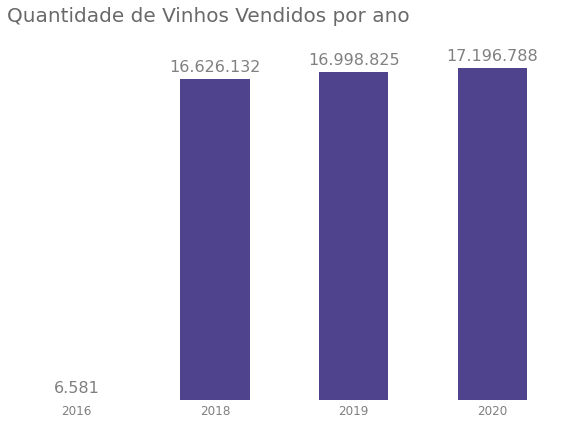

In [ ]:
#criando o fig e o ax no matplotlib
fig, ax  = plt.subplots(figsize=(8,6))

#criando o gráfico de barras
agrupamento_por_ano = df.groupby('year').sum()
agrupamento_por_ano.plot(y='sales',
                         ax=ax,
                         kind='bar',
                         legend=False,
                         color='#241571',
                         alpha=0.8)

ajuste_layout(ax=ax,
              titulo = 'Quantidade de Vinhos Vendidos por ano',
              addlabels = True,
              y = list(agrupamento_por_ano.sales),
              distancia = 400000)

#plotando o gráfico
plt.tight_layout();

Pelo gráfico acima, notamos que o ano de **2016** tem quantidades muito **diferentes** dos demais anos. Por conta disso, é preciso **analisar** mais a fundo se isso não é um **erro** de *entrada* de dados ou se a empresa operou em apenas **alguns** dias de 2016.

In [ ]:
#verificando quais datas aparecem de 2016
apenas_dados_2016 = df[df.year == 2016]
apenas_dados_2016.index

DatetimeIndex(['2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01',
               ...
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01', '2016-01-01', '2016-01-01',
               '2016-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='date', length=149, freq=None)

Após avaliarmos os **registros** do ano de 2016, notamos que todos eles são da **mesma** data. Portanto, estes dados **provavelmente** provém de algum tipo de erro e serão **retirados** de nossa base de dados. Além disso, é importante notar que **não** há dados de referentes ao ano de **2017**, então é possível que a empresa **começou** suas operações em 2018.

In [ ]:
#retirando os dados de 2016
df = df[df.year != 2016]

#conferindo se foi retirado
df.year.unique()

array([2018, 2019, 2020])

# Avaliando os outliers

- falar do boxplot do revenue
- falar do boxplot das quantidades
- falar do método iqr

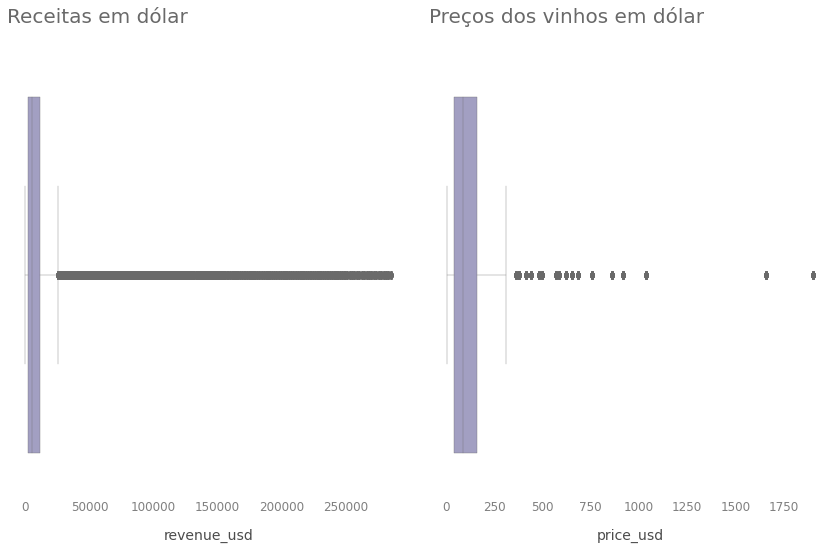

In [ ]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(12,8),dpi=72,ncols=2)

#criando o plot para receitas em dólar
sns.boxplot(data=df,x='revenue_usd',palette='Purples',linewidth=0.35,ax=ax[0])
ajuste_layout(ax=ax[0],
              titulo='Receitas em dólar',
              xlabel='revenue_usd')

#criando o plot para o preço do vinho
sns.boxplot(data=df,x='price_usd',palette='Purples',linewidth=0.35,ax=ax[1])
ajuste_layout(ax=ax[1],
              titulo='Preços dos vinhos em dólar',
              xlabel='price_usd')

#plotando o gráfico
plt.tight_layout(pad=2.0);

In [ ]:
#avaliando a porcentagem de outliers na receita em dólares
IQR = df.revenue_usd.quantile(0.75) - df.revenue_usd.quantile(0.25)
lim_sup = df.revenue_usd.quantile(0.75) + 1.5 * IQR
lim_inf = df.revenue_usd.quantile(0.25) - 1.5 * IQR

#Verificando porcentagem de valores que são outliers e sua receita
outliers_base_dados = df[(df.revenue_usd < lim_inf) | (df.revenue_usd > lim_sup)]
porcentagem_de_receita = outliers_base_dados.revenue_usd.sum()/df.revenue_usd.sum()
outliers = (df[(df.revenue_usd < lim_inf) | (df.revenue_usd > lim_sup)].shape[0]) / df.shape[0]

#Realizando o print dos resultados
print('Porcentagem de outliers: {:.2f}%'.format(outliers*100))
print('Os outliers são responsáveis por {:.2f}% da receita da empresa'.format(porcentagem_de_receita*100))

Porcentagem de outliers: 11.17%
Os outliers são responsáveis por 55.90% da receita da empresa


verificar a receita de cada ano

In [ ]:
#tabela com a receita de cada ano
df.groupby(by='year')['revenue_usd'].sum().to_frame()

,revenue_usd
year,
2018,2.880908e+09
2019,2.911967e+09
2020,2.945613e+09


vendas em um dia e boxplot

In [ ]:
#avaliando a quantidade de vendas diária
quantidade_de_vinhos_vendida_por_dia = df.groupby(by='date').sales.sum()
quantidade_de_vinhos_vendida_por_dia.to_frame().head()

,sales
date,
2018-01-01,43432
2018-01-02,43181
2018-01-03,43298
2018-01-04,42216
2018-01-05,42001
...,...
2020-12-27,45931
2020-12-28,42754
2020-12-29,43804


In [ ]:
#principais métricas de quantidades vendidas em um único dia
quantidade_de_vinhos_vendida_por_dia.describe().round(1).to_frame()

,sales
count,1096.0
mean,46370.2
std,2136.4
min,38322.0
25%,44833.8
50%,46327.0
75%,47699.5
max,52901.0


CONCLUSÃO SOBRE ESTA QUANTIDADE DE OUTLIERS

# Análise Exploratória dos Dados

texto texto

falar das estatísticas descritivas, falar que é de uma única venda

In [ ]:
df[['price_brl','price_usd','sales','revenue_usd','revenue_brl']].describe().round(1)

,price_brl,price_usd,sales,revenue_usd,revenue_brl
count,719922.0,719922.0,719922.0,719922.0,719922.0
mean,967.7,167.4,70.6,12138.1,70158.3
std,1406.5,243.3,41.4,22349.8,129181.7
min,52.8,9.1,1.0,9.1,52.8
25%,259.2,44.8,35.0,2253.8,13028.4
50%,509.4,88.1,67.0,5051.3,29198.4
75%,949.2,164.2,104.0,11428.3,66056.4
max,10992.0,1901.7,196.0,285259.5,1648800.0


ver histogramas dos preços e vendas, colocar tons de azul diferentes, mudar o eixo y

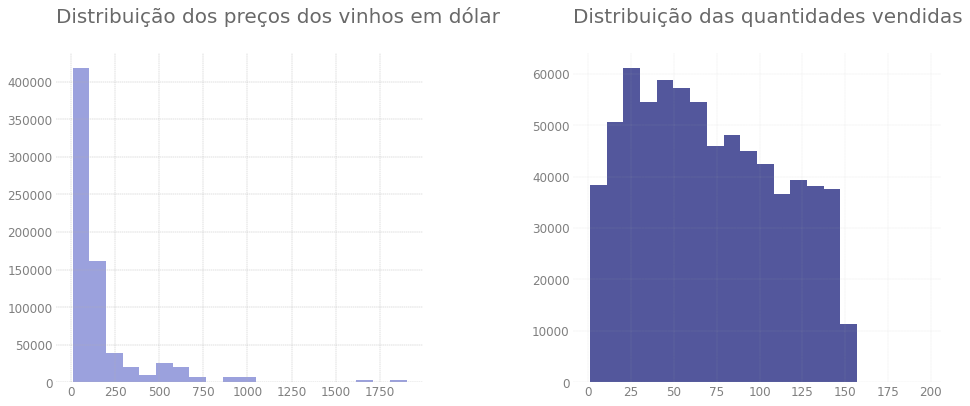

In [ ]:
#criando a fig e ax no matplotlib
fig, ax = plt.subplots(figsize=(14,6), ncols=2)

#criação do primeiro histograma
df.price_usd.hist(ax=ax[0],xlabelsize=10,ylabelsize=10,bins=20,color='#3944bc',alpha=0.5)
ajuste_layout(ax=ax[0],
              titulo='Distribuição dos preços dos vinhos em dólar',
              grid=True,grid_lw=0.4)

#criação do segundo histograma
df.sales.hist(ax=ax[1],xlabelsize=10,ylabelsize=10,bins=20,color='#0a1172',alpha=0.7)
ajuste_layout(ax=ax[1],
              titulo='Distribuição das quantidades vendidas',
              grid=True,grid_lw=0.14)

#plotando os gráficos
plt.tight_layout(pad=2.0)

fazer um boxplot apenas das lojas, vendas e dinheiro

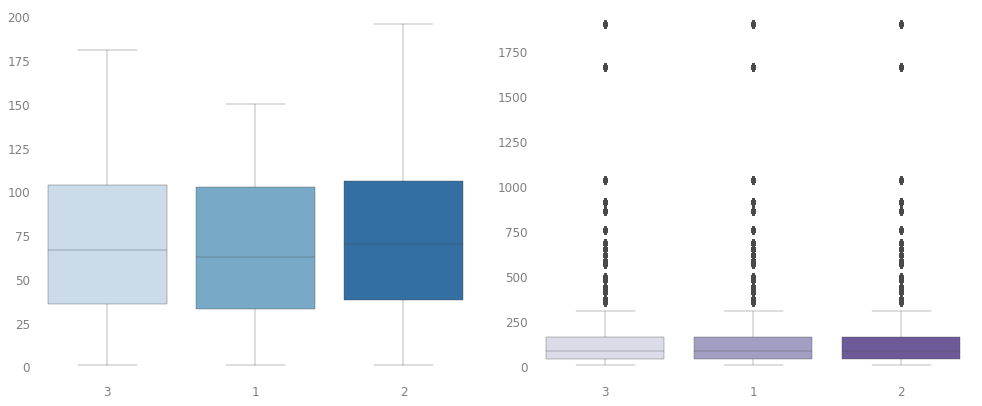

In [ ]:
#criando a fig e ax no matplotlib
fig, ax = plt.subplots(figsize=(14,6), ncols=2)

#criando o primeiro gráfico
sns.boxplot(data=df,x='store',y='sales',ax=ax[0],palette='Blues',linewidth=0.35)
ajuste_layout(ax=ax[0])

#criando o segundo gráfico
sns.boxplot(data=df,x='store',y='price_usd',ax=ax[1],palette='Purples',linewidth=0.35)
ajuste_layout(ax=ax[1])

#plotando os gráficos
plt.tight_layout(pad=2.0)

fazer um boxplot geral, vendas e dinheiro em dólar, colocar titulo

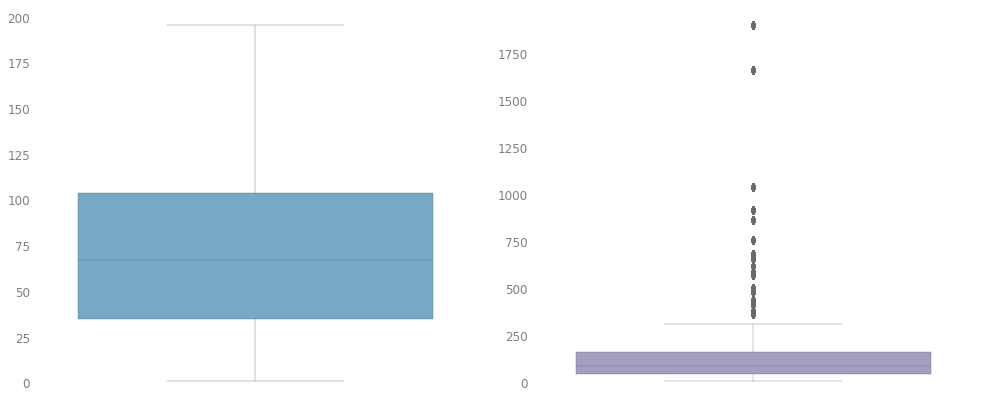

In [ ]:
#criando a fig e ax no matplotlib
fig, ax = plt.subplots(figsize=(14,6), ncols=2)

#criando o primeiro gráfico
sns.boxplot(data=df,y='sales',ax=ax[0],palette='Blues',linewidth=0.35)
ajuste_layout(ax=ax[0])

#criando o segundo gráfico
sns.boxplot(data=df,y='price_usd',ax=ax[1],palette='Purples',linewidth=0.35)
ajuste_layout(ax=ax[1])

#plotando os gráficos
plt.tight_layout(pad=2.0)

vinho mais caro

In [ ]:
#avaliando o preço do vinho mais caro
print('O vinho mais caro do catálogo é o {} que custa cerca USD {:,}\n'.format(df[df.price_usd == df.price_usd.max()].name[0],
                                                                             df.price_usd.max()))

#avaliando o preço do vinho mais barato
print('O vinho mais barato do catálogo é o {} que custa cerca USD {:,}'.format(df[df.price_usd == df.price_usd.min()].name[0],
                                                                             df.price_usd.min()))

O vinho mais caro do catálogo é o Domaine Ponsot Clos de La Roche Grand Cru Cuvee Vieilles Vignes - Magnum que custa cerca USD 1,901.73

O vinho mais barato do catálogo é o Cava Juvé & Camps Cinta Purpura Reserva Brut - 375ml (Half Bottle) que custa cerca USD 9.13


preço do vinho e quantidade vendida em scatterplot

#Séries Temporais

[link](https://www.inf.ufsc.br/~marcelo.menezes.reis/Cap4.pdf)

diferenças entre regressão e série temporal

In [ ]:
#verificando as datas iniciais e finais
print('Data inicial do dataset: ',df.index.min())
print('Data final do dataset: ',df.index.max())

Data inicial do dataset:  2018-01-01 00:00:00
Data final do dataset:  2020-12-31 00:00:00


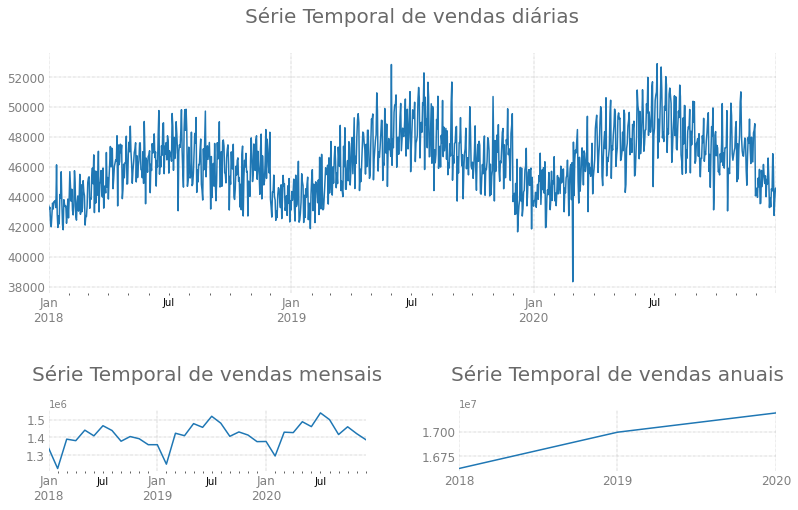

In [ ]:
#criando o fig e o ax no matplotlib
gridsize=(3,2)
fig=plt.figure(figsize=(12,8))

#o ax1 irá ocupar o equivalente a 2 colunas e 2 linhas
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

#criando o gráfico da time series diário

df.sales.resample('D').sum().plot(ax=ax1)
ajuste_layout(ax=ax1,
              titulo='Série Temporal de vendas diárias',location='center',
              grid=True,grid_lw=0.45,grid_style='-.')

#criando o gráfico da time series mensal
df.sales.resample('M').sum().plot(ax=ax2)
ajuste_layout(ax=ax2,
              titulo='Série Temporal de vendas mensais',location='center',
              grid=True,grid_lw=0.45,grid_style='-.')

#criando o gráfico da time series anual
df.sales.resample('Y').sum().plot(ax=ax3)
ajuste_layout(ax=ax3,
              titulo='Série Temporal de vendas anuais',location='center',
              grid=True,grid_lw=0.45,grid_style='-.')

#plotando os gráficos
plt.tight_layout(pad=4.0)

falar de separar em componentes

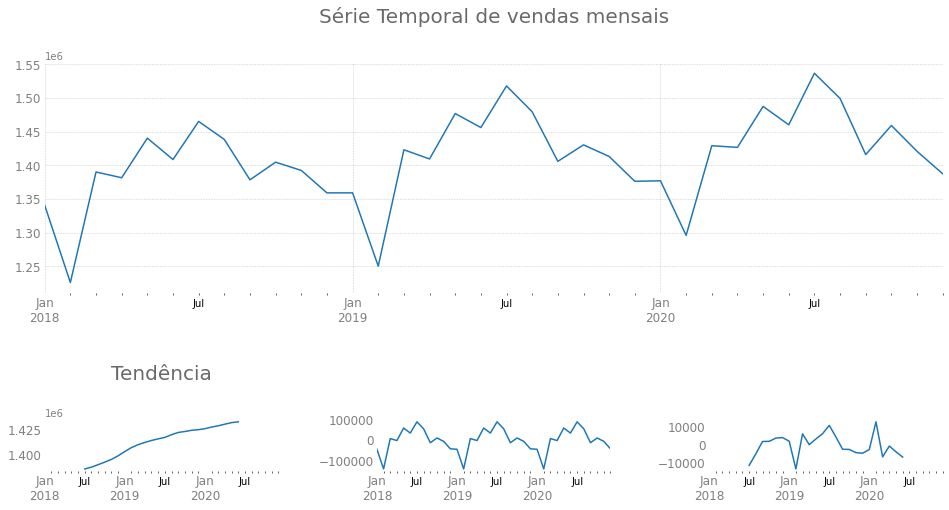

In [237]:
#criando o fig e o ax no matplotlib
gridsize=(3,3)
fig=plt.figure(figsize=(14,8))

#decompondo os componentes da série temporal
agregando_valores_mensais = df.sales.resample('M').sum().to_frame()
result = seasonal_decompose(agregando_valores_mensais.sales)

#o ax1 irá ocupar o equivalente a 2 colunas e 2 linhas
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=3, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))
ax4 = plt.subplot2grid(gridsize, (2, 2))

#construindo o primeiro gráfico
result.observed.plot(ax=ax1)
ajuste_layout(ax=ax1,location='center',
              titulo='Série Temporal de vendas mensais',
              grid=True,grid_lw=0.6,grid_style=':')

#construindo o segundo gráfico
result.trend.plot(ax=ax2)
ajuste_layout(ax=ax2,location='center',
              titulo='Tendência')

#construindo o terceiro gráfico
result.seasonal.plot(ax=ax3)
ajuste_layout(ax=ax3)

#construindo o quarto gráfico
result.resid.plot(ax=ax4)
ajuste_layout(ax=ax4)

#plotando os gráficos
plt.tight_layout(pad=4.0);

**Hipóteses**:

* x
* x
* x

### Verificando se a série é estacionária

falar do ADF e explicar as métricas, explicar h0, falar de p-valor

In [ ]:
#extrarir somente os valores
x = agregando_valores_mensais

#aplicar ADF e imprimir os resultados
result = adfuller(x.sales)
print('Teste Dickey–Fuller Aumentado:')
print('Teste estatístico: ','{:.2f}'.format(result[0]))
print('P-valor: ','{:.5f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
	print('\t{}: {:.2f}'.format(key, value));

Teste Dickey–Fuller Aumentado:
Teste estatístico:  -3.80
P-valor:  0.00293
Valores Críticos:
	1%: -3.67
	5%: -2.96
	10%: -2.62


texto falando sobre testes tradicionais utilizando nas previsões  e machine learning

In [ ]:
# definindo o tamanho da previsão para os três meses seguintes
prediction_size = 3
train = agregando_valores_mensais[:-prediction_size]
validation = agregando_valores_mensais[-prediction_size:]


#verificando a quantidade de valores
print('Treino:',train.shape[0],'registros')
print('Validação:',validation.shape[0],'registros')

Treino: 33 registros
Validação: 3 registros


# ARIMA

falar do arima, suas componentes e que é um modelo tradicional

[arima](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)


[youtube](https://www.youtube.com/watch?v=v7rZpT8NCbk&t=10s)

In [ ]:
#utilizar o auto_arima para obter os melhores parâmetros

In [ ]:
#fazer o fit do modelo

#XGBoost

texto explicando e  como é possível usar

[link](https://machinelearningmastery.com/xgboost-for-time-series-forecasting/)

#Prophet

Os desenvolvedores do **Facebook** perceberam que as técnicas **tradicionais** para realizar *forecasting* eram muito **inflexíveis** e incapazes de incorporar as nuances de cada **negócio**. Além disso, também observaram que era muito **raro** encontrar profissionais **qualificados** que tivessem a capacidade de fazer uma **boa** previsão.

Por conta disso, eles construiram uma **ferramenta** open-source, o [Prophet](https://facebook.github.io/prophet/). Naturalmente, o `Prophet` foi criado baseado na **experiência** do dia-a-dia que os desenvolvedores do *Facebook* enfrentavam.Ou seja, é previsor que considera a existência de **feriados**, observações **ausentes**, uma grande quantidade de **outliers**,etc.

Basicamente o `Prophet` utiliza um [modelo aditivo](http://www.producao.ufrgs.br/arquivos/disciplinas/119_teq6_st_decomposicao.pdf) que avalia a **tendência** (por métodos lineares ou regressão logística), a sazonalidade das **semanas** por [Séries de Fourier](https://www.ime.unicamp.br/sites/default/files/lem/material/series-de-fourier.pdf) e uma sazonalidade **semanal** por variáveis [dummy](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)).

Caso tenha mais **interesse** de avaliar como funciona o `Prophet` mais internamente, dê uma lida no [paper](https://peerj.com/preprints/3190.pdf) escrito por seus **desenvolvedores**.


In [ ]:
#ajustando a base de dados para utilizar no prophet
train_prophet = train.reset_index()

#renomeando o nome das colunas
train_prophet.columns = ['ds','y']

#visualizando as 5 últimas entradas
train_prophet.tail()

,ds,y
28,2020-05-31,1487594
29,2020-06-30,1460294
30,2020-07-31,1536899
31,2020-08-31,1499467
32,2020-09-30,1416026


In [ ]:
#instanciando o prophet
model_prophet = Prophet()

#realizando o fit do prophet
model_prophet.fit(train_prophet)

#determinar o periodo para previsão
future = model_prophet.make_future_dataframe(periods=prediction_size,freq='M')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Realizando as Previsões

Para calcular os **erros** de nossos modelos usaremos um *módulo* do scikit-learn, o [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Setaremos o **parâmetro** `squared` como *False* para calcular a **raiz quadrada** deste valor e **conseguir** comparar com valores que foram *estimados*.

Foi optado esta **métrica** porque queremos **reduzir** ao máximo a *diferença* entre os valores previstos e reais. Além disso, pretendemos utilizar o modelo que *menos* proporciona **outliers**, uma vez que **errar** demasiadamente o valor esperado pode gerar **custos** onerosos para a empresa de vinhos analisada.

A imagem abaixo ilustra o cálculo da métrica utilizada, o [RMSE (Root Mean Squared Error)](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/).

<p align='center'>
<img src="https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png" width="30%">
</p>

In [ ]:
#função para printar o erro
def printando_o_erro(y_true,y_pred,previsor):
  error = mse(y_true=y_true,y_pred=y_pred,squared=False)
  print('A raiz do erro-médio quadrado utilizando o modelo {} é de {:.2f}'.format(previsor,error))

Fazendo as *previsões* do **ARIMA** e avaliando o *modelo*.

In [ ]:
# fazer a previsao com arima e plot

In [ ]:
#calcular o erro
#printando_o_erro(y_true=validation.sales,y_pred=.yhat,previsor='ARIMA')

Fazendo as *previsões* do **XGBoost** e avaliando o *modelo*.

In [ ]:
# fazer a previsao com xgb e plot

In [ ]:
#calcular o erro
#printando_o_erro(y_true=validation.sales,y_pred=.yhat,previsor='XGBoost')

Fazendo as *previsões* do **Prophet** e avaliando o *modelo*.

In [212]:
#realizar a previsão com o período mensal estabelecido
forecast = model_prophet.predict(future)

#visualizando os 5 últimos registros
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
31,2020-08-31,1.415993e+06,1.499467e+06,1.499467e+06,1.415993e+06,1.415993e+06,83474.374331,83474.374331,83474.374331,83474.374331,83474.374331,83474.374331,0.0,0.0,0.0,1.499467e+06
32,2020-09-30,1.413475e+06,1.416026e+06,1.416026e+06,1.413475e+06,1.413475e+06,2550.676940,2550.676940,2550.676940,2550.676940,2550.676940,2550.676940,0.0,0.0,0.0,1.416026e+06
33,2020-10-31,1.410874e+06,1.379978e+06,1.383991e+06,1.408614e+06,1.412627e+06,-28636.162745,-28636.162745,-28636.162745,-28636.162745,-28636.162745,-28636.162745,0.0,0.0,0.0,1.382238e+06
34,2020-11-30,1.408357e+06,1.360611e+06,1.377338e+06,1.400013e+06,1.416740e+06,-39401.960987,-39401.960987,-39401.960987,-39401.960987,-39401.960987,-39401.960987,0.0,0.0,0.0,1.368955e+06
35,2020-12-31,1.405756e+06,1.343086e+06,1.375663e+06,1.388541e+06,1.421118e+06,-45455.209022,-45455.209022,-45455.209022,-45455.209022,-45455.209022,-45455.209022,0.0,0.0,0.0,1.360300e+06


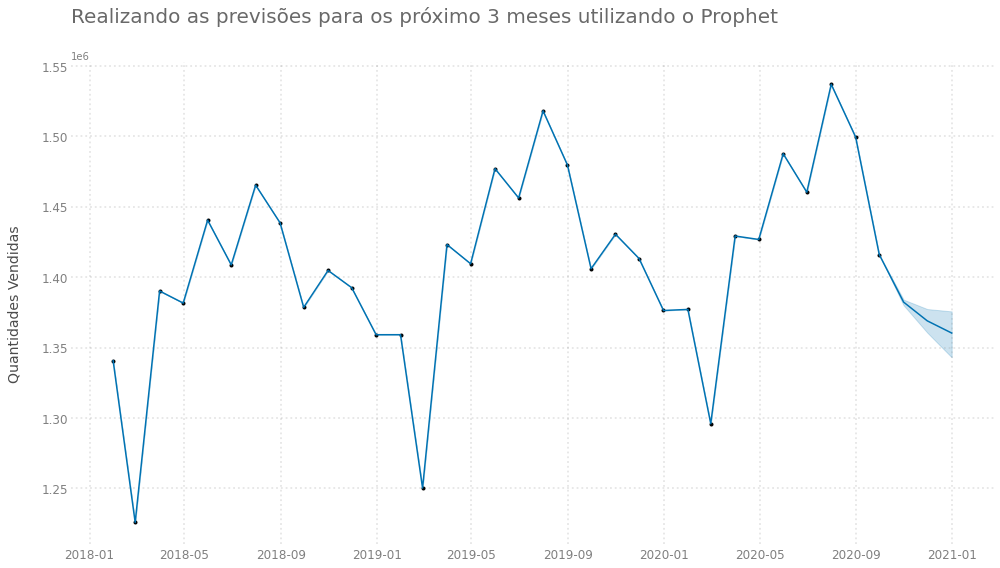

In [217]:
#crian do ax e o plt
fig, ax = plt.subplots(figsize=(14,8))

#criando gráfico
model_prophet.plot(forecast,ax=ax)
ajuste_layout(ax=ax,
              titulo='Realizando as previsões para os próximo 3 meses utilizando o Prophet',
              ylabel='Quantidades Vendidas',
              grid=True,grid_lw=1.8,grid_style='dotted')

#plotando os gráficos
plt.tight_layout();

In [211]:
#calcular o erro
printando_o_erro(y_true=validation.sales,y_pred=forecast[-prediction_size:].yhat,previsor='Prophet')

A raiz do erro-médio quadrado utilizando o modelo Prophet é de 55873.93


#Conclusões

* x
* x
* x
